In [1]:
#import Libraries
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
# Read the data
df = pd.read_excel("/content/Data_Census .xlsx")


In [3]:
#top rows
df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [4]:
#Last 5 rows
df.tail()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


In [5]:
df.shape

(640, 61)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [9]:
# Check for null values
print("Null Values:")
df.isnull().sum()


Null Values:


State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [10]:
# Check for duplicate values
print("Duplicate Values:")
df.duplicated().sum()

Duplicate Values:


0

In [11]:
# Summary statistics
print("Summary Statistics:")
df.describe()


Summary Statistics:


,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,17.114062,320.500000,51222.871875,79940.576563,122372.084375,12309.098438,11942.300000,13820.946875,20778.392188,6191.807813,...,1392.973438,2757.050000,250.889062,558.098438,560.690625,1293.431250,71.379688,200.742188,510.014063,704.778125
std,9.426486,184.896367,48135.405475,73384.511114,113600.717282,11500.906881,11326.294567,14426.373130,21727.887713,9912.668948,...,1489.707052,2788.776676,453.336594,1117.642748,762.578991,1585.377936,107.897627,309.740854,610.603187,910.209225
min,1.000000,1.000000,350.000000,391.000000,698.000000,56.000000,56.000000,0.000000,0.000000,0.000000,...,4.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,9.000000,160.750000,19484.000000,30228.000000,46517.750000,4733.750000,4672.250000,3466.250000,5603.250000,293.750000,...,489.500000,957.250000,47.000000,109.000000,136.500000,298.000000,14.000000,43.000000,161.000000,220.500000
50%,18.000000,320.500000,35837.000000,58339.000000,87724.500000,9159.000000,8663.000000,9591.500000,13709.000000,2333.500000,...,949.000000,1928.000000,114.500000,247.500000,308.000000,717.000000,35.000000,113.000000,326.000000,464.500000
75%,24.000000,480.250000,68892.000000,107918.500000,164251.750000,16520.250000,15902.250000,19429.750000,29180.000000,7658.000000,...,1714.000000,3599.750000,270.750000,568.750000,642.000000,1710.750000,79.000000,240.000000,604.500000,853.500000
max,35.000000,640.000000,310450.000000,485417.000000,750392.000000,96223.000000,95129.000000,103307.000000,156429.000000,96785.000000,...,9875.000000,21611.000000,5775.000000,17153.000000,6116.000000,13714.000000,895.000000,3354.000000,6456.000000,10533.000000


In [12]:
# Perform exploratory analysis on selected variables
selected_variables = ['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06']
selected_data = df[selected_variables]

In [14]:

# Select the variables for analysis
variables = ['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06']

# Descriptive analysis - univariate
descriptive_stats = df[variables].describe()
print("Descriptive Statistics:")
descriptive_stats


Descriptive Statistics:


,No_HH,TOT_M,TOT_F,M_06,F_06
count,640.000000,640.000000,640.000000,640.000000,640.000000
mean,51222.871875,79940.576563,122372.084375,12309.098438,11942.300000
std,48135.405475,73384.511114,113600.717282,11500.906881,11326.294567
min,350.000000,391.000000,698.000000,56.000000,56.000000
25%,19484.000000,30228.000000,46517.750000,4733.750000,4672.250000
50%,35837.000000,58339.000000,87724.500000,9159.000000,8663.000000
75%,68892.000000,107918.500000,164251.750000,16520.250000,15902.250000
max,310450.000000,485417.000000,750392.000000,96223.000000,95129.000000


In [15]:
#Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Scale the numeric data using the z-score method
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)

# Convert the scaled data back into a DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=numeric_columns.columns)

In [37]:
numeric_columns

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,7707,23388,29796,5862,6196,3,0,1999,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,6218,19585,23102,4482,3733,7,6,427,...,525,715,123,229,186,148,76,178,140,160
2,1,3,4452,6546,10964,1082,1018,3,6,5806,...,114,188,44,89,3,34,0,4,67,61
3,1,4,1320,2784,4206,563,677,0,0,2666,...,194,247,61,128,13,50,4,10,116,59
4,1,5,11654,20591,29981,5157,4587,20,33,7670,...,874,1928,465,1043,205,302,24,105,180,478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,34,636,3333,8154,11781,1146,1203,21,30,0,...,32,47,0,0,0,0,0,0,32,47
636,34,637,10612,12346,21691,1544,1533,2234,4155,0,...,155,337,3,14,38,130,4,23,110,170
637,35,638,1275,1549,2630,227,225,0,0,1012,...,104,134,9,4,2,6,17,47,76,77
638,35,639,3762,5200,8012,723,664,0,0,28,...,136,172,24,44,11,21,1,4,100,103


In [16]:
# Create the covariance matrix
cov_matrix = np.cov(scaled_data.T)
cov_matrix

array([[1.00156495, 0.99457535, 0.38502614, ..., 0.03409773, 0.12572474,
        0.23208471],
       [0.99457535, 1.00156495, 0.37756089, ..., 0.03334295, 0.11226784,
        0.21313518],
       [0.38502614, 0.37756089, 1.00156495, ..., 0.53769433, 0.76357722,
        0.73684378],
       ...,
       [0.03409773, 0.03334295, 0.53769433, ..., 1.00156495, 0.61052325,
        0.52191235],
       [0.12572474, 0.11226784, 0.76357722, ..., 0.61052325, 1.00156495,
        0.88228018],
       [0.23208471, 0.21313518, 0.73684378, ..., 0.52191235, 0.88228018,
        1.00156495]])

In [17]:
# Get eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)


In [18]:
eigenvalues

array([ 3.18674263e+01+0.00000000e+00j,  8.18907061e+00+0.00000000e+00j,
        4.54275124e+00+0.00000000e+00j,  3.84336785e+00+0.00000000e+00j,
        2.27105793e+00+0.00000000e+00j,  1.95992589e+00+0.00000000e+00j,
        1.37548006e+00+0.00000000e+00j,  8.87342674e-01+0.00000000e+00j,
        7.19897963e-01+0.00000000e+00j,  6.14059555e-01+0.00000000e+00j,
        4.94399686e-01+0.00000000e+00j,  4.24147991e-01+0.00000000e+00j,
        3.43932360e-01+0.00000000e+00j,  2.75961760e-01+0.00000000e+00j,
        2.96118628e-01+0.00000000e+00j,  1.84995268e-01+0.00000000e+00j,
        1.28846861e-01+0.00000000e+00j,  1.11536962e-01+0.00000000e+00j,
        1.03594789e-01+0.00000000e+00j,  9.73429345e-02+0.00000000e+00j,
        7.82132546e-02+0.00000000e+00j,  5.59614544e-02+0.00000000e+00j,
        4.44214277e-02+0.00000000e+00j,  3.78654873e-02+0.00000000e+00j,
        2.96705436e-02+0.00000000e+00j,  2.70572400e-02+0.00000000e+00j,
        2.34417688e-02+0.00000000e+00j,  1.43611558

In [19]:
eigenvectors

array([[-3.00700521e-02+0.00000000e+00j, -1.62782525e-01+0.00000000e+00j,
        -2.50129023e-01+0.00000000e+00j, ...,
        -4.94850247e-14+1.57661036e-15j,  4.09731171e-14+0.00000000e+00j,
         4.61186307e-14+0.00000000e+00j],
       [-3.00751392e-02+0.00000000e+00j, -1.58821825e-01+0.00000000e+00j,
        -2.59359844e-01+0.00000000e+00j, ...,
         5.04613681e-14-1.75731998e-15j, -4.09054603e-14+0.00000000e+00j,
        -4.78571941e-14+0.00000000e+00j],
       [-1.56432451e-01+0.00000000e+00j, -1.28322211e-01+0.00000000e+00j,
        -3.34978669e-02+0.00000000e+00j, ...,
         8.04600150e-14-1.19885068e-14j, -4.82582995e-14+0.00000000e+00j,
        -1.19839346e-13+0.00000000e+00j],
       ...,
       [-1.31868671e-01+0.00000000e+00j,  5.40694563e-02+0.00000000e+00j,
        -1.83333910e-03+0.00000000e+00j, ...,
        -5.14573346e-02-1.18804614e-02j,  3.75567610e-02+0.00000000e+00j,
         4.37636852e-02+0.00000000e+00j],
       [-1.50219557e-01+0.00000000e+00j, -5.

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


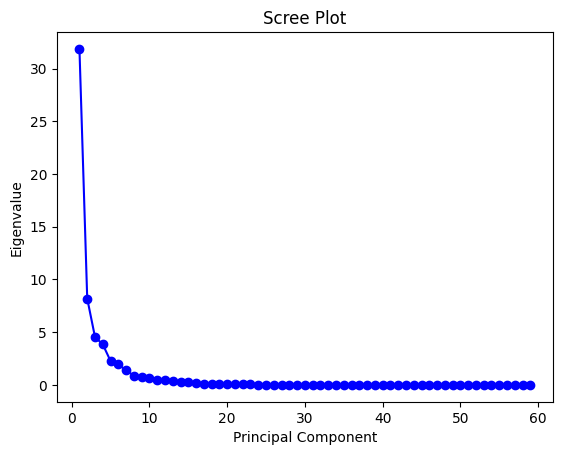

Optimum Number of Principal Components: 7


In [22]:
# Scree plot
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'bo-')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.show()

# Calculate explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Identify the optimum number of principal components
optimal_num_pc = np.argmax(cumulative_explained_variance >= 0.9) + 1
print("Optimum Number of Principal Components:", optimal_num_pc)


In [26]:
# Drop categorical values
df = df.select_dtypes(exclude=['object'])
df

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,7707,23388,29796,5862,6196,3,0,1999,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,6218,19585,23102,4482,3733,7,6,427,...,525,715,123,229,186,148,76,178,140,160
2,1,3,4452,6546,10964,1082,1018,3,6,5806,...,114,188,44,89,3,34,0,4,67,61
3,1,4,1320,2784,4206,563,677,0,0,2666,...,194,247,61,128,13,50,4,10,116,59
4,1,5,11654,20591,29981,5157,4587,20,33,7670,...,874,1928,465,1043,205,302,24,105,180,478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,34,636,3333,8154,11781,1146,1203,21,30,0,...,32,47,0,0,0,0,0,0,32,47
636,34,637,10612,12346,21691,1544,1533,2234,4155,0,...,155,337,3,14,38,130,4,23,110,170
637,35,638,1275,1549,2630,227,225,0,0,1012,...,104,134,9,4,2,6,17,47,76,77
638,35,639,3762,5200,8012,723,664,0,0,28,...,136,172,24,44,11,21,1,4,100,103


Variable with the highest contribution to each principal component:
PC 1 : TOT_F
PC 2 : No_HH
PC 3 : No_HH
PC 4 : F_ST
PC 5 : TOT_M
PC 6 : F_SC
PC 7 : No_HH

Inferences about the principal components in terms of actual variables:
PC 1 explains variance mainly related to: TOT_F, MARGWORK_3_6_F, TOT_M
PC 2 explains variance mainly related to: F_ILL, F_LIT, TOT_WORK_F
PC 3 explains variance mainly related to: MAINWORK_F, TOT_WORK_F, F_LIT
PC 4 explains variance mainly related to: F_ST, M_ST, F_SC
PC 5 explains variance mainly related to: MAINWORK_M, TOT_WORK_M, F_ST
PC 6 explains variance mainly related to: F_SC, M_SC, MAINWORK_F
PC 7 explains variance mainly related to: No_HH, MARGWORK_3_6_F, TOT_WORK_F


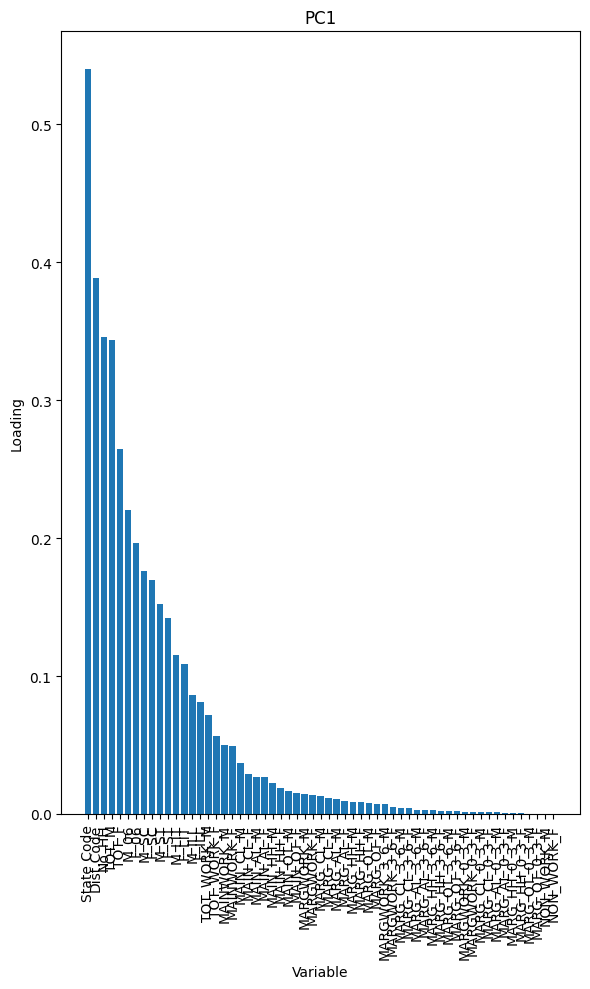

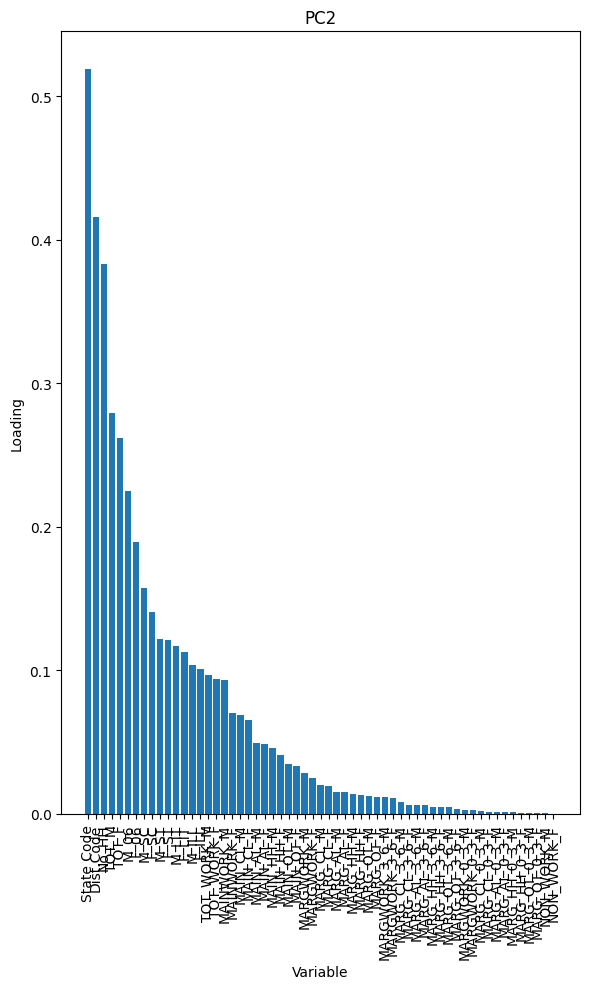

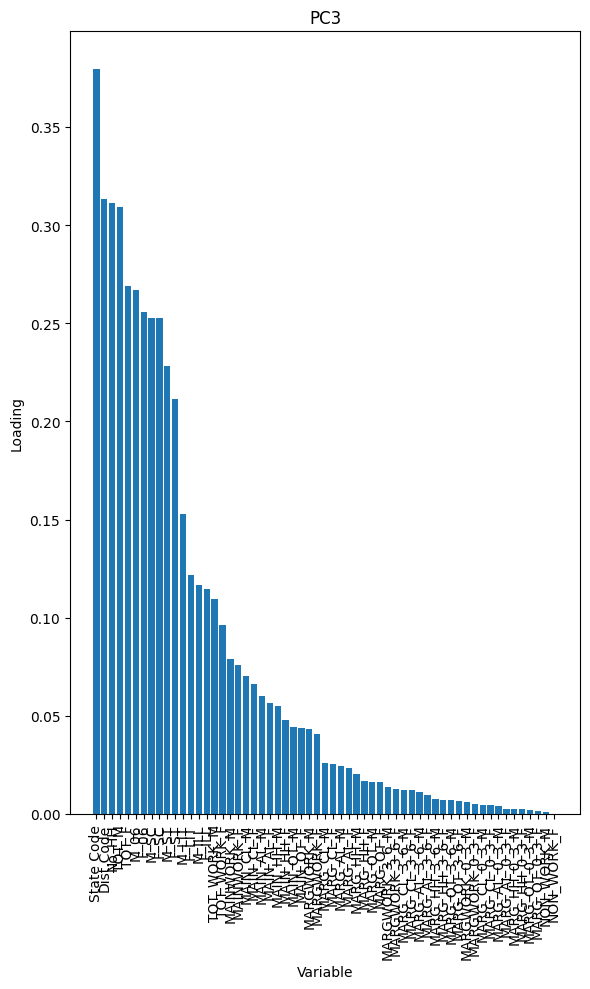

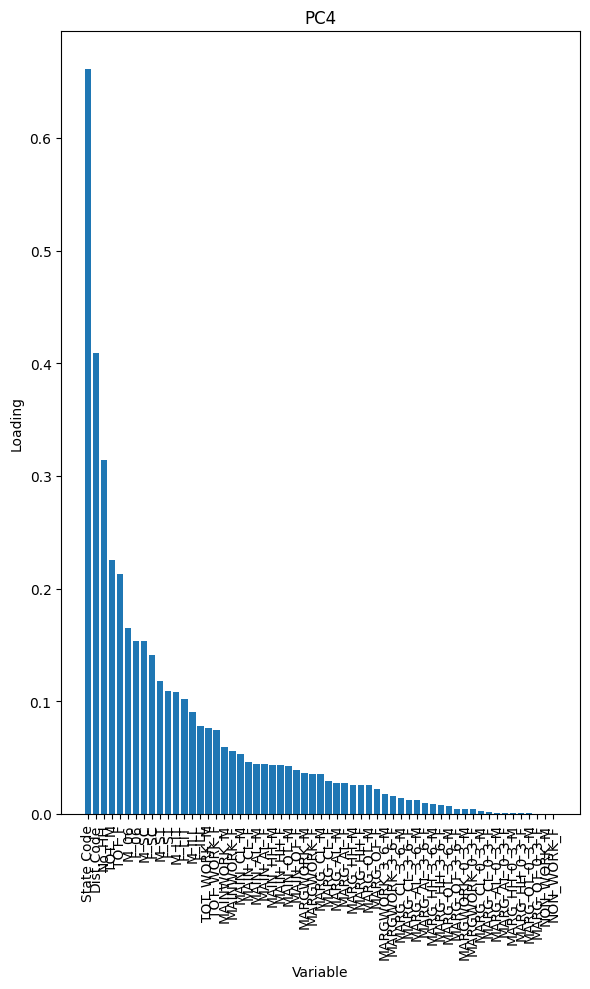

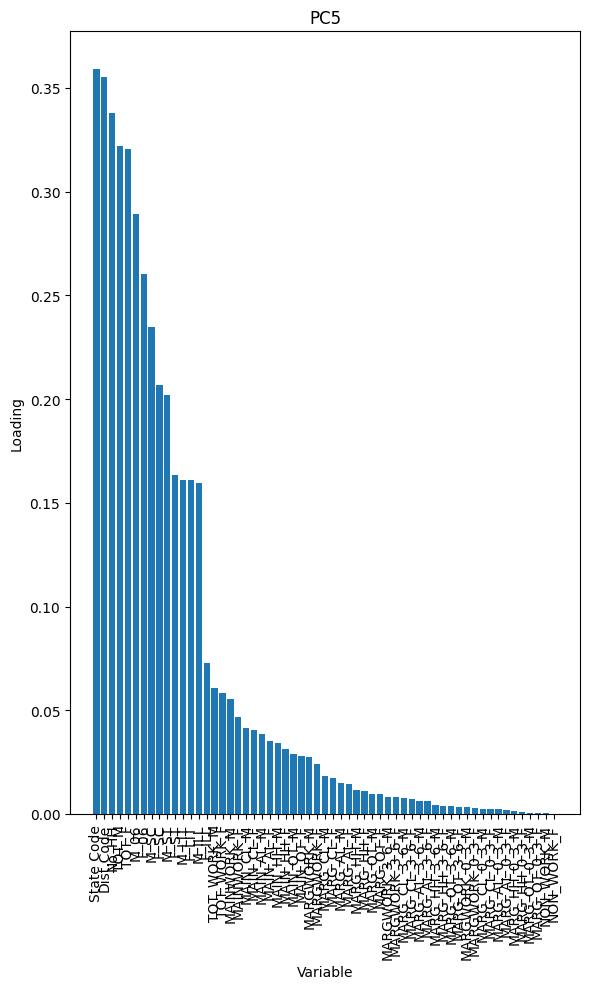

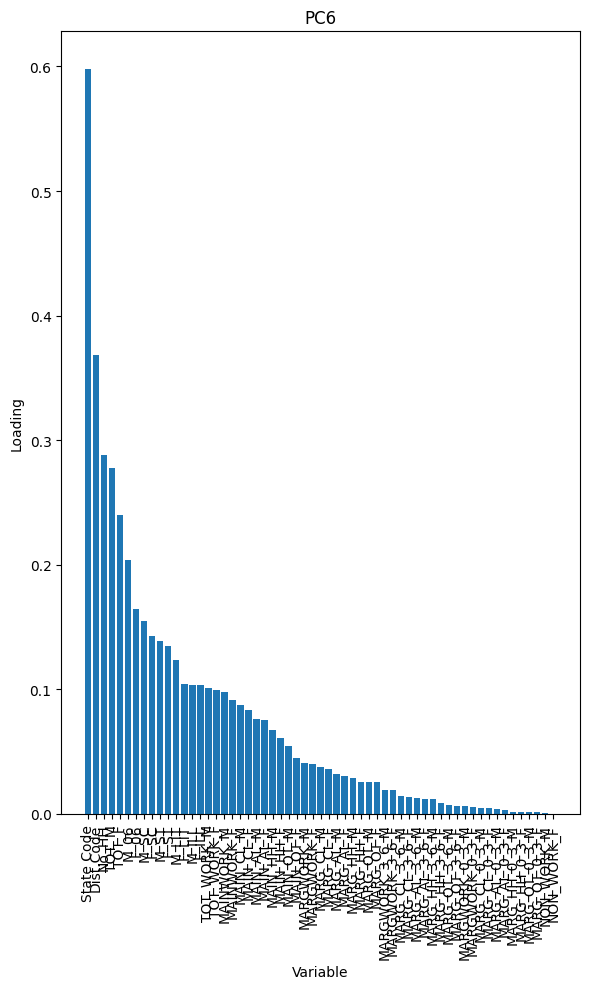

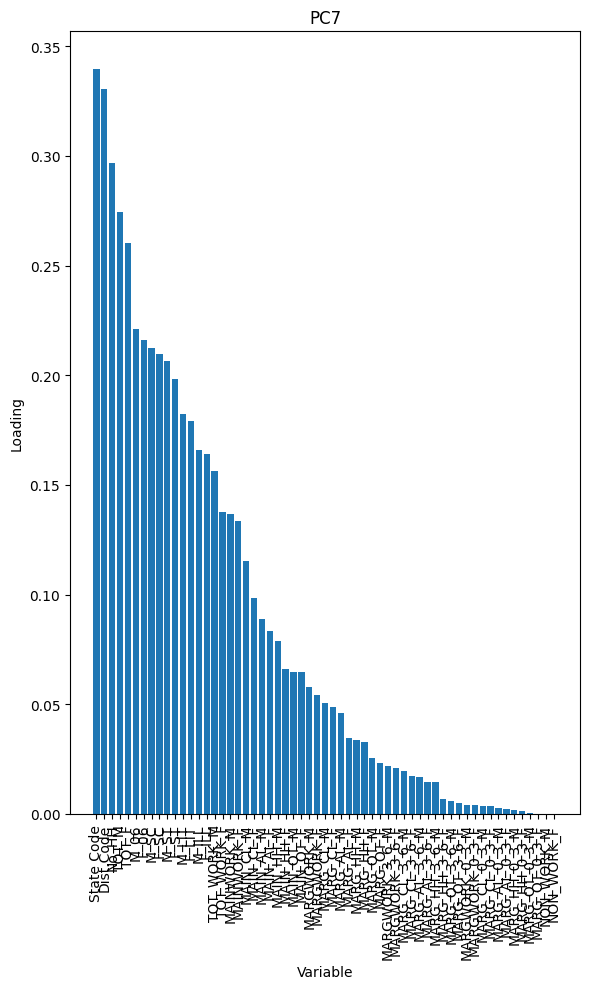

In [28]:


# PCA with the optimal number of components
pca = PCA(n_components=optimal_num_pc)
X_pca_optimal = pca.fit_transform(df)

# Get the absolute values of the loadings
loadings = np.abs(pca.components_)

# Create a DataFrame to store the loadings
loadings_df = pd.DataFrame(loadings, columns=df.columns)

# Calculate the total variance explained by each principal component
total_variance_explained = np.sum(eigenvalues)

# Ensure that sorted_eigenvalues has the same length as the number of columns in loadings_df
if len(eigenvalues) < len(loadings_df.columns):
    eigenvalues = np.pad(eigenvalues, (0, len(loadings_df.columns) - len(eigenvalues)), mode='constant')

# Calculate the variance explained by each variable in each principal component
variance_explained_by_variable = loadings_df.apply(lambda x: (x ** 2) * (eigenvalues / total_variance_explained), axis=1)



# Identify the variable with the highest contribution to each principal component
variable_with_highest_contribution = variance_explained_by_variable.idxmax(axis=1)

# Calculate the cumulative variance explained by each variable across all principal components
cumulative_variance_explained_by_variable = variance_explained_by_variable.cumsum()

# Print the results
print("Variable with the highest contribution to each principal component:")
for i in range(optimal_num_pc):
    print("PC", i+1, ":", variable_with_highest_contribution[i])

print("\nInferences about the principal components in terms of actual variables:")
for i in range(optimal_num_pc):
    print("PC", i+1, "explains variance mainly related to:", ', '.join(loadings_df.columns[loadings_df.iloc[i].argsort()[::-1][:3]]))

# Bar graph for each principal component
for i in range(optimal_num_pc):
    plt.figure(figsize=(6, 10))

    # Plot the bar graph for the i-th Principal Component
    plt.bar(range(len(loadings_df.columns)), loadings_df.iloc[i].sort_values(ascending=False))

    plt.title("PC" + str(i + 1))
    plt.xlabel("Variable")
    plt.ylabel("Loading")
    plt.xticks(range(len(loadings_df.columns)), loadings_df.columns, rotation=90)

    plt.tight_layout()
    plt.show()


In [29]:
#Step 6: Interpret the results
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)


Explained Variance Ratio: [0.91663062 0.03161782 0.02640444 0.00765518 0.00587676 0.00324394
 0.00271812]


In [31]:
# Step 7: Transform the data
transformed_data = pd.DataFrame(data=X_pca_optimal, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7'])


In [33]:

# Print the transformed data
transformed_data.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-169560.786993,19577.935467,-11747.201976,-592.062880,2520.078941,-7137.393155,4334.983554
1,-180763.413126,18724.239309,-7014.949774,-5104.374581,500.251619,-6783.951279,3844.567906
2,-204855.961704,18551.826154,7798.211758,2361.680789,-260.685720,-6.544274,1582.664036
3,-216533.759943,21461.653623,5427.176449,-3281.343746,2022.579952,-383.420490,2158.241876
4,-170589.413008,16094.139369,-3656.032811,8219.282895,1927.438615,-2483.024029,2485.872272
